In [1]:
from fastai.text.all import *
#from nbdev.showdoc import *

In [2]:
train = pd.read_csv('../imdb_extracted/train/train_imdb.csv')
train.head()

,text,label
0,"Many reviews I've read reveals that most people tend to like Part One better than Part Two. I feel exactly the opposite. Part One played around a bit much with trying to find different ways of showing Che Guevara's personality through different types of film stock, different locations, and cutting back and forth between an interview and the Cuban revolution. For the most part it was structured finely but somewhat distracting. In Part Two, Che enters Bolivia, and along with changing geographical location, the rules and the structure changes. Gone are the spacial jumps and switching between ...",1
1,"The effect achieved in this story about a psychiatrist who becomes involved with con artists is so mannered that I have to assume that that was the desired intent. The sets are artificial and at no time did I not feel that I was watching a movie. It seemed like the actors were just reading their lines, rather than responding to one another. While the film has elements of early film noir (except that it is in color) the approach is so exaggerated that I almost have to conclude that it is a parody of the genre.<br /><br />Given that the presentation had no appeal to me, I was at least expect...",0
2,I really enjoyed the performances of the main cast. Emma Lung is courageous and interesting. The director has developed performances where the characters are not one dimensional. A complex story with the changing between eras. Also appreciated the underlying story of the unions losing power and the effect of a large employer closing on a small town. I do not agree with the comment that the older man has to be attractive. There have be many relationships with older men and younger women - without the male being good looking. Depth of character can be appealing to the not so shallow. The fil...,1
3,"'Midnight Cowboy' was rated X with the original release back in 1969. There are some scenes where you can understand that, just a little. The movie about Joe Buck (Jon Voight) coming from Texas to New York City to become a hustler is sometimes a little disturbing. Dressed up as a cowboy he tries to live as a hustler, making money by the act of love. It does not work out as he planned. After a guy named Rico 'Ratso' Rizzo (Dustin Hoffman) first pulled a trick on him and stole some money they become friends. They live in an empty and very filthy apartment. Then Ratso gets sick and Joe has to...",1
4,"As the maker of ""This Darkness,"" I admit we neglected 3 very important acknowledgments in our end credits. The omissions were over-sights that could not be corrected once committed, nor did the parties involved --- who saw the movie --- mention it at the time. On behalf of the excellent cast and crew of the film, I extend them an apology. Obviously, some criticisms posted here are harsh in light of their credit being accidentally. Our production values were negligible and our ""special effects"" were quite special indeed, but the plot is very strong and the cinematography by John McLeod is s...",1


In [3]:
train["is_valid"] = [False for i in range(len(train))]
train

,text,label,is_valid
0,"Many reviews I've read reveals that most people tend to like Part One better than Part Two. I feel exactly the opposite. Part One played around a bit much with trying to find different ways of showing Che Guevara's personality through different types of film stock, different locations, and cutting back and forth between an interview and the Cuban revolution. For the most part it was structured finely but somewhat distracting. In Part Two, Che enters Bolivia, and along with changing geographical location, the rules and the structure changes. Gone are the spacial jumps and switching between ...",1,False
1,"The effect achieved in this story about a psychiatrist who becomes involved with con artists is so mannered that I have to assume that that was the desired intent. The sets are artificial and at no time did I not feel that I was watching a movie. It seemed like the actors were just reading their lines, rather than responding to one another. While the film has elements of early film noir (except that it is in color) the approach is so exaggerated that I almost have to conclude that it is a parody of the genre.<br /><br />Given that the presentation had no appeal to me, I was at least expect...",0,False
2,I really enjoyed the performances of the main cast. Emma Lung is courageous and interesting. The director has developed performances where the characters are not one dimensional. A complex story with the changing between eras. Also appreciated the underlying story of the unions losing power and the effect of a large employer closing on a small town. I do not agree with the comment that the older man has to be attractive. There have be many relationships with older men and younger women - without the male being good looking. Depth of character can be appealing to the not so shallow. The fil...,1,False
3,"'Midnight Cowboy' was rated X with the original release back in 1969. There are some scenes where you can understand that, just a little. The movie about Joe Buck (Jon Voight) coming from Texas to New York City to become a hustler is sometimes a little disturbing. Dressed up as a cowboy he tries to live as a hustler, making money by the act of love. It does not work out as he planned. After a guy named Rico 'Ratso' Rizzo (Dustin Hoffman) first pulled a trick on him and stole some money they become friends. They live in an empty and very filthy apartment. Then Ratso gets sick and Joe has to...",1,False
4,"As the maker of ""This Darkness,"" I admit we neglected 3 very important acknowledgments in our end credits. The omissions were over-sights that could not be corrected once committed, nor did the parties involved --- who saw the movie --- mention it at the time. On behalf of the excellent cast and crew of the film, I extend them an apology. Obviously, some criticisms posted here are harsh in light of their credit being accidentally. Our production values were negligible and our ""special effects"" were quite special indeed, but the plot is very strong and the cinematography by John McLeod is s...",1,False
...,...,...,...
19995,"An overlong, but compelling retelling of the friendship between civil rights leader Steve Biko and Donald Woods. The first half of the film is the strongest where we see the bond formed between the two men, and how they help each other out, but the second half isn't as strong, due to the elimination of the Biko character. Still, its a compelling film with great performances by Kline and Washington, in the film that put the latter on the map. Washington was also was nominated for best supporting actor for the first time. Overall, a well made film that could have been trimmed down a bit. 7/1...",1,False
19996,"Stephen King movies are a funny thing with me. I either really love them or I loathe them. Some of the fancier productions (such as Desperation and Storm of the Century) I didn't enjoy. Some of the smaller ones, I really loved. Sleepwalkers is one that I really do enjoy and wat

In [4]:
val = pd.read_csv('../imdb_extracted/val/val_imdb.csv')
val["is_valid"] = [True for i in range(len(val))]
val

,text,label,is_valid
0,"Chloe is mysteriously saved from Dr. Caselli, the corrupt doctor responsible for transferring patients with abilities from Belle Reve to Project 33.1, and a fraction of second later Clark arrives. He finds that Bart Allan has returned to Smallville and they meet each other in Kent Farm. When Bart is captured by Lex during a break-in in a LuthorCorp's facility, Clark discovers that the Green Arrow had also hired Bart (a.k.a. Impulse), Arthur Curry (Aquaman) and Victor Stone (Cyborg) to investigate the Project 33.1. Clark accepts to join the trio to save Bart and invites Chloe to participate...",1,True
1,"The star of this film is the screenplay. Attention to detail for the period in dress, language ,social mores ( we don't hurt women) and the politics are remarkable. It is a reminder of Kosovo to-day. The subtle pieces in the action scenes are there for an attentive viewer and the choreography of these action sequences is superb. Perhaps this film is to close to the bone of reality to earn the support it should have received. It is like a staircase of increasing violence with well paced pauses of peace and serenity between each step. A great film....",1,True
2,"In the questionable comedy vein of Mel Brooks, ""Wholly Moses!"" tries to take the Bible story of Moses and make fun of it, resulting in the unfunniest Biblical spoof ever filmed.<br /><br />There is no real plot here, just excuses to trot out stalwart comedy talent in underwritten roles. Dudley Moore and Laraine Newman are on a bus tour of the Holy Land, when they stumble across an ancient scroll in a cave. There they read the story of Herschel and Zerelda, also played by Moore and Newman. Herschel's life parallels Moses'. He was sent down the river to be found by the pharaoh's family at th...",0,True
3,"There was a great film to be made about Steve Biko. Sadly this wasn't it. Denzel Washington - never the most flexible of actors - is totally unable to convey the great charisma that Biko had. Attenborough's big crowd scenes are laughable. The Soweto massacre wasn't like this, three neat lines of children ( some doing cartwheels!) marching happily into the guns of the soldiers. With Biko dead the film rapidly descends into farce. If the struggle against Apartheid was anything it was a black people's struggle yet somehow we are all supposed to be gripped by the escape of a white man and his ...",0,True
4,I just saw the movie on tv. I really enjoyed it. I like a good mystery. and this one had me guessing up to the end. Sean Connery did a good job. I would recomend it to a friend.,1,True
...,...,...,...
4995,"Caught this film in about 1990 on video by chance and without knowing what i was in for. Many horror fans may have missed this thinking it was a typical prison film and the ones who did get it didn't like it as it was not what they wanted to see. The above mentioned factors are probably the reasons it is low rated but just ignore that and give it a whirl if you're a fan of the genre.<br /><br />It has strong suits in all departments from script and atmosphere to acting and the prison itself. <br /><br />An absolute diamond, a film i still have on video to this day. Check it out.",1,True
4996,"This is quite possibly the worst film I have ever seen. Worse than the most abhorrent American dross; worse than Glitter - Mariah Carey in American dross par excellence. I can only imagine that the writer and producer were taking huge amounts of recreational pharmaceuticals, and when discussing the plot actually thought it was a good idea. it's not. It is abject rubbish from very bowels of Satan himself (who could probably have written a better script had he put his mind to it). Robert Jones as Exce Producer, spending our tax payers money (lottery money folks) on this piece of nonsense, sh...",0,True
4997,The original book of this was set in the 1950s but that won't do for the TV series because most people watch for the 1930s style. Ironically the tube train

In [5]:
df = pd.concat((train,val), axis = 0)
df.index = [i for i in range(len(df))]
df

,text,label,is_valid
0,"Many reviews I've read reveals that most people tend to like Part One better than Part Two. I feel exactly the opposite. Part One played around a bit much with trying to find different ways of showing Che Guevara's personality through different types of film stock, different locations, and cutting back and forth between an interview and the Cuban revolution. For the most part it was structured finely but somewhat distracting. In Part Two, Che enters Bolivia, and along with changing geographical location, the rules and the structure changes. Gone are the spacial jumps and switching between ...",1,False
1,"The effect achieved in this story about a psychiatrist who becomes involved with con artists is so mannered that I have to assume that that was the desired intent. The sets are artificial and at no time did I not feel that I was watching a movie. It seemed like the actors were just reading their lines, rather than responding to one another. While the film has elements of early film noir (except that it is in color) the approach is so exaggerated that I almost have to conclude that it is a parody of the genre.<br /><br />Given that the presentation had no appeal to me, I was at least expect...",0,False
2,I really enjoyed the performances of the main cast. Emma Lung is courageous and interesting. The director has developed performances where the characters are not one dimensional. A complex story with the changing between eras. Also appreciated the underlying story of the unions losing power and the effect of a large employer closing on a small town. I do not agree with the comment that the older man has to be attractive. There have be many relationships with older men and younger women - without the male being good looking. Depth of character can be appealing to the not so shallow. The fil...,1,False
3,"'Midnight Cowboy' was rated X with the original release back in 1969. There are some scenes where you can understand that, just a little. The movie about Joe Buck (Jon Voight) coming from Texas to New York City to become a hustler is sometimes a little disturbing. Dressed up as a cowboy he tries to live as a hustler, making money by the act of love. It does not work out as he planned. After a guy named Rico 'Ratso' Rizzo (Dustin Hoffman) first pulled a trick on him and stole some money they become friends. They live in an empty and very filthy apartment. Then Ratso gets sick and Joe has to...",1,False
4,"As the maker of ""This Darkness,"" I admit we neglected 3 very important acknowledgments in our end credits. The omissions were over-sights that could not be corrected once committed, nor did the parties involved --- who saw the movie --- mention it at the time. On behalf of the excellent cast and crew of the film, I extend them an apology. Obviously, some criticisms posted here are harsh in light of their credit being accidentally. Our production values were negligible and our ""special effects"" were quite special indeed, but the plot is very strong and the cinematography by John McLeod is s...",1,False
...,...,...,...
24995,"Caught this film in about 1990 on video by chance and without knowing what i was in for. Many horror fans may have missed this thinking it was a typical prison film and the ones who did get it didn't like it as it was not what they wanted to see. The above mentioned factors are probably the reasons it is low rated but just ignore that and give it a whirl if you're a fan of the genre.<br /><br />It has strong suits in all departments from script and atmosphere to acting and the prison itself. <br /><br />An absolute diamond, a film i still have on video to this day. Check it out.",1,True
24996,"This is quite possibly the worst film I have ever seen. Worse than the most abhorrent American dross; worse than Glitter - Mariah Carey in American dross par excellence. I can only imagine that the writer and producer were taking huge amounts of recreational pharmaceuticals, and when discussi

In [6]:
set_seed(42,True)

In [7]:
dbunch_lm = TextDataLoaders.from_df(
    df, 
    text_col='text', 
    label_col='label',
    path='../imdb_extracted/',
    is_lm=True,
    valid_col='is_valid'
)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck


In [8]:
bs = 128

In [9]:
learn = language_model_learner(dbunch_lm, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity()]).to_fp16()

SuggestedLRs(valley=0.004365158267319202)

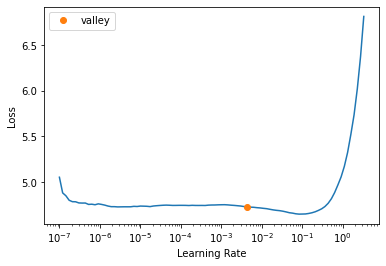

In [12]:
learn.lr_find()

In [11]:
set_seed(42,True)

In [12]:
learn.fit_one_cycle(1, 0.004, moms=(0.8,0.7,0.8))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.078225,4.004957,0.291804,54.869450,04:37


In [13]:
learn.unfreeze()

In [14]:
set_seed(42,True)

In [15]:
learn.fit_one_cycle(7, 0.004, moms=(0.8,0.7,0.8))

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.914845,3.933997,0.297703,51.110878,05:09
1,3.890113,3.900837,0.301753,49.443836,05:09
2,3.741693,3.850452,0.308312,47.014317,05:11
3,3.548692,3.821673,0.312658,45.680565,05:15
4,3.315612,3.820830,0.314556,45.642090,05:14
5,3.089318,3.857024,0.313915,47.324303,05:17
6,2.944428,3.894212,0.312519,49.117344,05:15


In [21]:
test = pd.read_csv('../imdb_extracted/test/test_imdb.csv')
test

,text,label
0,"I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theat...",1
1,"Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror ""Frailty"", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as ""The Greatest Game Ever Played."" I'm no fan of golf, and these scrappy underdog sports flicks are a dime a dozen (most recently done to grand effect with ""Miracle"" and ""Cinderella Man""), but some how this film was enthralling all the same.<br /><br />The film starts with some creative opening credits (imagine a Disney...",1
2,"As a recreational golfer with some knowledge of the sport's history, I was pleased with Disney's sensitivity to the issues of class in golf in the early twentieth century. The movie depicted well the psychological battles that Harry Vardon fought within himself, from his childhood trauma of being evicted to his own inability to break that glass ceiling that prevents him from being accepted as an equal in English golf society. Likewise, the young Ouimet goes through his own class struggles, being a mere caddie in the eyes of the upper crust Americans who scoff at his attempts to rise above ...",1
3,"I saw this film in a sneak preview, and it is delightful. The cinematography is unusually creative, the acting is good, and the story is fabulous. If this movie does not do well, it won't be because it doesn't deserve to. Before this film, I didn't realize how charming Shia Lebouf could be. He does a marvelous, self-contained, job as the lead. There's something incredibly sweet about him, and it makes the movie even better. The other actors do a good job as well, and the film contains moments of really high suspense, more than one might expect from a movie about golf. Sports movies are a d...",1
4,"Bill Paxton has taken the true story of the 1913 US golf open and made a film that is about much more than an extra-ordinary game of golf. The film also deals directly with the class tensions of the early twentieth century and touches upon the profound anti-Catholic prejudices of both the British and American establishments. But at heart the film is about that perennial favourite of triumph against the odds.<br /><br />The acting is exemplary throughout. Stephen Dillane is excellent as usual, but the revelation of the movie is Shia LaBoeuf who delivers a disciplined, dignified and highly s...",1
...,...,...
24995,"I occasionally let my kids watch this garbage so they will understand just how pathetic the show's ""contestants"" are. They are pathetic not because they are fat, but because they whore their dignity for a few minutes of fame and fortune.<br /><br />For anyone to appear on National TV and blubber, sniffle, and whine about being fat (entirely their own fault) is nauseating. What does this say about us as a nation? Does it suggest that your lifestyle choices, and the consequences of them, aren't our responsibility? <br /><br />""The Biggest Loser"" is an appropriate title, but it has nothing to...",0
24996,When all we have anymore is pretty much reality TV shows with people making fools of themselves for whatever reason be it too fat or can't sing or cook worth a damn than I know Hollywood has run out of original ideas. I can not recall a time when anything original or intelligent came out on TV in the last 15 years. W

In [17]:
learn.save_encoder('fine_tuned_enc')

In [18]:
len(dbunch_lm.vocab)

38384

In [10]:
def read_tokenized_file(f): return L(f.read_text().split(' '))

In [21]:
max(max(train.text.str.split().str.len().max(), val.text.str.split().str.len().max()), test.text.str.split().str.len().max())

2470

In [11]:
dbunch_clas = TextDataLoaders.from_df(
    df, 
    text_col='text', 
    label_col='label',
    path='../imdb_extracted/',
    seq_len = 80,
    valid_col='is_valid',
    get_x=read_tokenized_file,
    get_y = parent_label
)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `n_workers` has to be changed to 0 to avoid getting stuck
Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [12]:
set_seed(42,True)

In [13]:
learn = text_classifier_learner(dbunch_clas, AWD_LSTM, drop_mult=0.5, metrics=accuracy).to_fp16()
learn.load_encoder('fine_tuned_enc')

In [14]:
set_seed(42,True)

SuggestedLRs(valley=0.0020892962347716093)

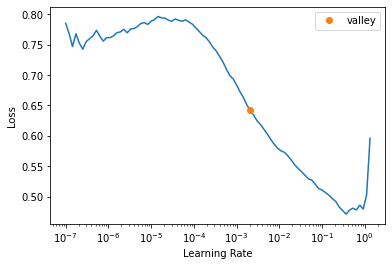

In [15]:
learn.lr_find()

In [16]:
set_seed(42,True)

In [17]:
learn.fit_one_cycle(1, 0.002, moms=(0.8,0.7,0.8))

epoch,train_loss,valid_loss,accuracy,time
0,0.278808,0.251642,0.904000,01:09


In [18]:
set_seed(42,True)

In [19]:
learn.unfreeze()
learn.fit_one_cycle(2, 0.002, moms=(0.8,0.7,0.8))

epoch,train_loss,valid_loss,accuracy,time
0,0.217313,0.210862,0.918000,02:20
1,0.122668,0.192235,0.930800,02:21


In [22]:
import warnings
from IPython.display import clear_output
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

res_pred = []
for text in test['text']:
    res_pred.append(int(learn.predict(text)[0]))
    clear_output(wait=True)

In [23]:
from sklearn.metrics import accuracy_score

accuracy_score(res_pred, test['label'])

0.92796

In [2]:
150/60

2.5

In [3]:
44+2.5

46.5

In [30]:
learn.unfreeze()
learn.fit_one_cycle(3, 0.002, moms=(0.8,0.7,0.8))

epoch,train_loss,valid_loss,accuracy,time
0,0.222276,0.242179,0.899000,02:21
1,0.145724,0.197174,0.928800,02:21
2,0.065724,0.213217,0.930800,02:21


In [32]:
import warnings
from IPython.display import clear_output
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once')

res_pred = []
for text in test['text']:
    res_pred.append(int(learn.predict(text)[0]))
    clear_output(wait=True)




In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(res_pred, test['label'])

0.9286

In [34]:
from sklearn.metrics import f1_score
f1_score(res_pred, test['label'], average='weighted')

0.9286257847082797